# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np 
import json
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
#load dataframe created in data wrangling phase
#parse datetime column
df= pd.read_csv('cleaned_cov_weather3.csv', parse_dates=[0])

In [3]:
df.head()

,date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_avg_temp,ct_prcp,ma_avg_temp,ma_prcp,CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases
0,2020-01-22,-28,0,-72.0,0.0,-76.0,0.0,-53.0,0.0,0,0,0,0
1,2020-01-23,-27,0,-30.0,3.0,-46.0,0.0,0.0,0.0,0,0,0,0
2,2020-01-24,-8,0,-14.0,0.0,6.0,0.0,19.0,0.0,0,0,0,0
3,2020-01-25,3,119,-30.0,3.0,23.0,218.0,33.0,25.0,0,0,0,0
4,2020-01-26,22,23,11.0,132.0,49.0,0.0,64.0,193.0,0,0,0,0


In [4]:
#double check data types
df.dtypes

date             datetime64[ns]
vt_avg_temp               int64
vt_prcp                   int64
me_avg_temp             float64
me_prcp                 float64
ct_avg_temp             float64
ct_prcp                 float64
ma_avg_temp             float64
ma_prcp                 float64
CT_conf_cases             int64
ME_conf_cases             int64
MA_conf_cases             int64
VT_conf_cases             int64
dtype: object

In [5]:
#Convert int columns to float in preparation for calculations:
int_columns= {"CT_conf_cases": 'float', "ME_conf_cases": 'float', "MA_conf_cases":"float", "VT_conf_cases":'float', "vt_avg_temp":'float', "vt_prcp":'float'}
df = df.astype(int_columns)

In [6]:
df.dtypes

date             datetime64[ns]
vt_avg_temp             float64
vt_prcp                 float64
me_avg_temp             float64
me_prcp                 float64
ct_avg_temp             float64
ct_prcp                 float64
ma_avg_temp             float64
ma_prcp                 float64
CT_conf_cases           float64
ME_conf_cases           float64
MA_conf_cases           float64
VT_conf_cases           float64
dtype: object

In [7]:
#Any missing values?
df[pd.isnull(df).any(axis=1)]

,date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_avg_temp,ct_prcp,ma_avg_temp,ma_prcp,CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases


No missing values.

However, the units of TAVG and PRCP are clearly off. 

According to [NOAA documentation](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt), temperatures are reported in __*tenths*__ of a degree Celsius. I'll convert to degrees Fahrenheit instead (since this is US data here).

In [9]:
# (C*9/50)+32=F (since C is reported here as tenths of degrees)
df2=df
df2['vt_avg_temp'] = ((df['vt_avg_temp']*9)/50) + 32
df2['me_avg_temp'] = ((df['me_avg_temp']*9)/50) + 32
df2['ct_avg_temp'] = ((df['ct_avg_temp']*9)/50) + 32
df2['ma_avg_temp'] = ((df['ma_avg_temp']*9)/50) + 32

The [same documention](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) cited above also explains that PRCP data is reported in __*tenths*__ of a mm. [Wikipedia](https://en.wikipedia.org/wiki/Precipitation) reports that generally PRCP data is reported in millimeters, so I'll convert to millimeters instead.

In [12]:
df3=df2
df3['vt_prcp'] = df2['vt_prcp']/10
df3['me_prcp'] = df2['me_prcp']/10
df3['ct_prcp'] = df2['ct_prcp']/10
df3['ma_prcp'] = df2['ma_prcp']/10

In [13]:
df3.head()

,date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_avg_temp,ct_prcp,ma_avg_temp,ma_prcp,CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases
0,2020-01-22,26.96,0.0,19.04,0.0,18.32,0.0,22.46,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,27.14,0.0,26.60,0.3,23.72,0.0,32.00,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,30.56,0.0,29.48,0.0,33.08,0.0,35.42,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,32.54,11.9,26.60,0.3,36.14,21.8,37.94,2.5,0.0,0.0,0.0,0.0
4,2020-01-26,35.96,2.3,33.98,13.2,40.82,0.0,43.52,19.3,0.0,0.0,0.0,0.0


For the sake of clarity, I'll update column names to reflect this unit change.

In [14]:
#Update column names to reflect new units:
units_dict= {'vt_avg_temp': 'VT_Avg_Temp(F)', 'vt_prcp': 'VT_PRCP(mm)', 'me_avg_temp':'ME_Avg_Temp(F)', 'me_prcp': 'ME_PRCP(mm)', 'ct_avg_temp': 'CT_Avg_Temp(F)', 'ct_prcp':'CT_PRCP(mm)', 'ma_avg_temp': 'MA_Avg_Temp(F)', 'ma_prcp':'MA_PRCP(mm)'}
df3.rename(columns=units_dict, inplace=True)
df3.head()

,date,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_Avg_Temp(F),CT_PRCP(mm),MA_Avg_Temp(F),MA_PRCP(mm),CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases
0,2020-01-22,26.96,0.0,19.04,0.0,18.32,0.0,22.46,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,27.14,0.0,26.60,0.3,23.72,0.0,32.00,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,30.56,0.0,29.48,0.0,33.08,0.0,35.42,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,32.54,11.9,26.60,0.3,36.14,21.8,37.94,2.5,0.0,0.0,0.0,0.0
4,2020-01-26,35.96,2.3,33.98,13.2,40.82,0.0,43.52,19.3,0.0,0.0,0.0,0.0


In [15]:
#Examine timespan of data:
print('Beginning date: ',min(df3['date']))
print('End date: ', max(df3['date']))
print('Total timespan: ', max(df3['date']-min(df3['date'])))

Beginning date:  2020-01-22 00:00:00
End date:  2021-09-12 00:00:00
Total timespan:  599 days 00:00:00


In [18]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x,y,color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors = color)

In [20]:
# Make copy of df 
df4=df3

In [21]:
# Make column of non-cumulative counts of confirmed cases for each state:
df4["CT_Conf_Cases"] = df4['CT_conf_cases'].diff().fillna(0)
df4["VT_Conf_Cases"] = df4['VT_conf_cases'].diff().fillna(0)
df4["ME_Conf_Cases"] = df4['ME_conf_cases'].diff().fillna(0)
df4["MA_Conf_Cases"] = df4['MA_conf_cases'].diff().fillna(0)

In [28]:
df5 = df4.drop(columns=['CT_conf_cases', 'VT_conf_cases', 'ME_conf_cases', 'MA_conf_cases'])

In [30]:
df5.set_index('date',inplace=True)
df5

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_Avg_Temp(F),CT_PRCP(mm),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases
date,,,,,,,,,,,,
2020-01-22,26.96,0.0,19.04,0.0,18.32,0.0,22.46,0.0,0.0,0.0,0.0,0.0
2020-01-23,27.14,0.0,26.60,0.3,23.72,0.0,32.00,0.0,0.0,0.0,0.0,0.0
2020-01-24,30.56,0.0,29.48,0.0,33.08,0.0,35.42,0.0,0.0,0.0,0.0,0.0
2020-01-25,32.54,11.9,26.60,0.3,36.14,21.8,37.94,2.5,0.0,0.0,0.0,0.0
2020-01-26,35.96,2.3,33.98,13.2,40.82,0.0,43.52,19.3,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,72.86,24.1,63.50,0.0,70.16,0.0,71.96,0.0,219.0,0.0,4.0,260.0
2021-09-09,67.46,0.0,62.42,35.3,71.42,3.8,70.88,8.1,136.0,0.0,1.0,364.0
2021-09-10,59.90,0.5,58.46,13.0,66.92,0.0,68.54,0.0,151.0,4.0,2.0,307.0


In [41]:
df5.describe()

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_Avg_Temp(F),CT_PRCP(mm),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,51.046325,2.253146,45.169205,2.917881,54.173974,3.558278,54.302864,3.770364,153.082781,0.561258,1.387417,243.678808
std,19.888186,5.818653,19.495882,9.129633,17.492540,10.199061,16.923667,10.274149,282.454046,1.337514,3.098532,300.012813
min,2.120000,0.000000,-1.840000,0.000000,11.660000,0.000000,14.000000,0.000000,-7.000000,-2.000000,-5.000000,-69.000000
25%,35.060000,0.000000,30.020000,0.000000,39.200000,0.000000,40.325000,0.000000,0.000000,0.000000,0.000000,30.750000
50%,51.440000,0.000000,46.490000,0.000000,55.490000,0.000000,54.500000,0.000000,45.500000,0.000000,0.000000,128.000000
75%,68.000000,1.300000,62.060000,1.300000,70.160000,1.300000,68.540000,2.000000,178.250000,1.000000,2.000000,346.250000
max,84.920000,63.500000,80.060000,131.100000,85.640000,103.400000,87.980000,95.000000,2336.000000,15.000000,37.000000,1607.000000


It looks like some of the states have min conf_cases values that are less than zero. That can't be right; I'll replace them with zeroes instead.

In [43]:
df5[df5 < 0] = 0

With so many twin axes to plot, I'll define a function to plot all of twin axes time series data:

In [44]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x,y,color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors = color)

## Plots:

## Connecticut

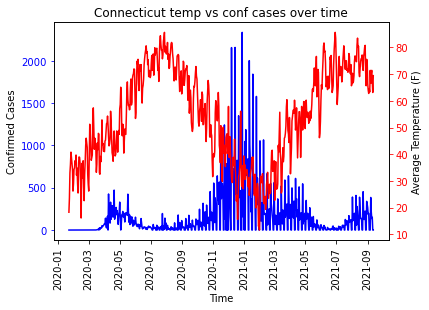

In [52]:
#Plot CT time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['CT_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot CT temp vs time
plot_timeseries(ax2, df5.index, df5['CT_Avg_Temp(F)'], 'red', 'Time', 'Average Temperature (F)')
plt.title('Connecticut temp vs conf cases over time')
plt.xticks(rotation=90)
plt.show()

It looks like confirmed cases very regularly return to zero. It would be worthwhile to further examine this... is this a pattern that represents an error?

In [53]:
df5.CT_Conf_Cases.tail(30)

date
2021-08-14      0.0
2021-08-15      0.0
2021-08-16    388.0
2021-08-17    266.0
2021-08-18    138.0
2021-08-19    139.0
2021-08-20    118.0
2021-08-21      0.0
2021-08-22      0.0
2021-08-23    453.0
2021-08-24    188.0
2021-08-25    124.0
2021-08-26    202.0
2021-08-27    224.0
2021-08-28      0.0
2021-08-29      0.0
2021-08-30    339.0
2021-08-31    307.0
2021-09-01    266.0
2021-09-02    185.0
2021-09-03    196.0
2021-09-04      0.0
2021-09-05      0.0
2021-09-06      0.0
2021-09-07    385.0
2021-09-08    219.0
2021-09-09    136.0
2021-09-10    151.0
2021-09-11      0.0
2021-09-12      0.0
Name: CT_Conf_Cases, dtype: float64

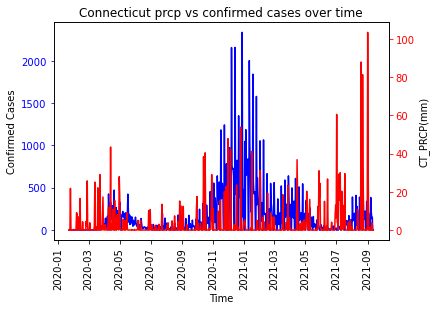

In [54]:
#Plot CT time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['CT_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot CT prcp vs time
plot_timeseries(ax2, df5.index, df5['CT_PRCP(mm)'], 'red', 'Time', 'CT_PRCP(mm)')
plt.title('Connecticut prcp vs confirmed cases over time')
plt.xticks(rotation=90)
plt.show()

***

## Maine

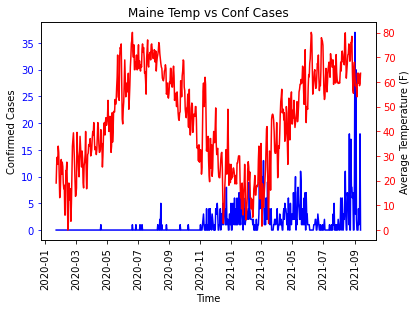

In [55]:
#Plot ME time vs Avg. Temp 
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['ME_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
plot_timeseries(ax2, df5.index, df5['ME_Avg_Temp(F)'], 'red', 'Time', 'Average Temperature (F)')
plt.title('Maine Temp vs Conf Cases')
plt.xticks(rotation=90)
plt.show()

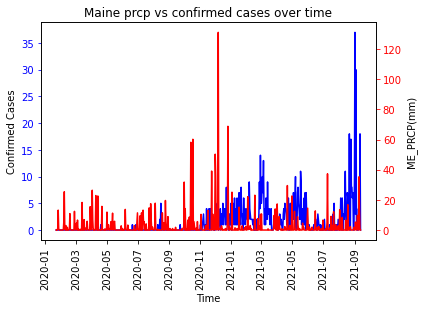

In [56]:
#Plot ME time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['ME_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot ME prcp vs time
plot_timeseries(ax2, df5.index, df5['ME_PRCP(mm)'], 'red', 'Time', 'ME_PRCP(mm)')
plt.title('Maine prcp vs confirmed cases over time')
plt.xticks(rotation=90)
plt.show()

## Massachusetts

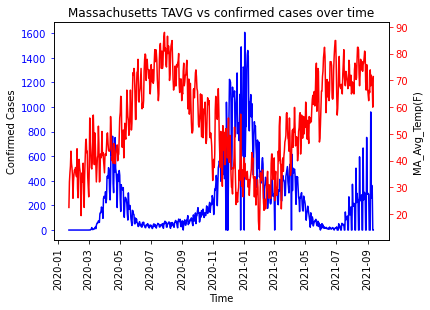

In [59]:
#Plot MA time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['MA_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot MA temp vs time
plot_timeseries(ax2, df5.index, df5['MA_Avg_Temp(F)'], 'red', 'Time', 'MA_Avg_Temp(F)')
plt.title('Massachusetts TAVG vs confirmed cases over time')
plt.xticks(rotation=90)
plt.show()

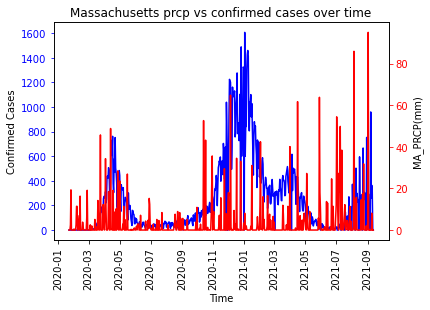

In [60]:
#Plot MA time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['MA_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot MA prcp vs time
plot_timeseries(ax2, df5.index, df5['MA_PRCP(mm)'], 'red', 'Time', 'MA_PRCP(mm)')
plt.title('Massachusetts prcp vs confirmed cases over time')
plt.xticks(rotation=90)
plt.show()

## Vermont

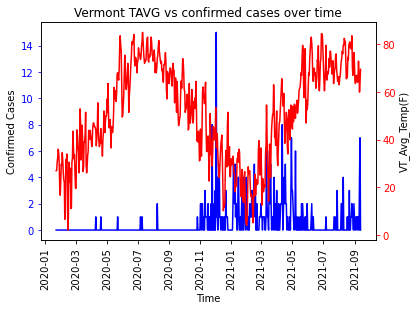

In [61]:
#Plot VT time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['VT_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot VT temp vs time
plot_timeseries(ax2, df5.index, df5['VT_Avg_Temp(F)'], 'red', 'Time', 'VT_Avg_Temp(F)')
plt.title('Vermont TAVG vs confirmed cases over time')
plt.xticks(rotation=90)
plt.show()

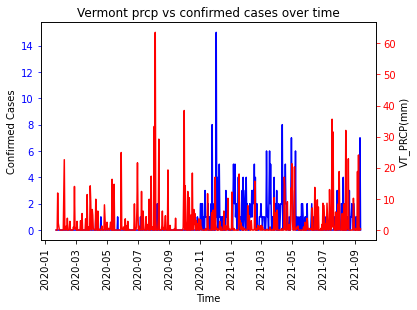

In [62]:
#Plot VT time vs confirmed cases
fig, ax = plt.subplots()
plot_timeseries(ax, df5.index, df5['VT_Conf_Cases'], 'blue', 'Time', 'Confirmed Cases')
plt.xticks(rotation=90)
ax2 = ax.twinx()
#Plot MA prcp vs time
plot_timeseries(ax2, df5.index, df5['VT_PRCP(mm)'], 'red', 'Time', 'VT_PRCP(mm)')
plt.title('Vermont prcp vs confirmed cases over time')
plt.xticks(rotation=90)
plt.show()